In [1]:
%load_ext autoreload
%env CUDA_VISIBLE_DEVICES=

import sys
sys.path.append('..')

env: CUDA_VISIBLE_DEVICES=


In [121]:
%autoreload

from topic_manifolds.simplicial_manfiolds import *
from topic_manifolds.topic_manifolds import *

import matplotlib, time, networkx as nx
from pathlib import Path
%matplotlib inline

In [3]:
RAW_FILEPATH = Path('../sample_datasets/wikisent2.txt')
PKL_FILEPATH = Path('../sample_datasets/wikisent2_feat.pkl')

assert RAW_FILEPATH.exists()
assert PKL_FILEPATH.exists()

# Source: https://www.kaggle.com/mikeortman/wikipedia-sentences
with open(RAW_FILEPATH, mode='r') as f: text_data = f.readlines()

with open(PKL_FILEPATH, mode='rb') as f:
    X, LDA, topics, first_topic, sents_by_topic, topic_correlations = pickle.load(f)
n_sents_by_topic = {t: len(sents) for t, sents in sents_by_topic.items()}

/crimea/conda_envs/topic_manifolds/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator LatentDirichletAllocation from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [4]:
%%time
T = TopicCombinationSet(topics, cliques_to_check=15, do_verbose=True)
T.get_optimal_topic_set(15)

Calculating valid simplices at parameter settings...
Dropping 2075571 examples as they lack sufficient probability mass in their top-3.

Observe 47951 simplices (of 161700 total possible) in total across 7871825 examples.



In [122]:
%%time
M = TopicSimplicialManifold(
    dataset            = X,
    topic_combinations = T,
    manifold_kwargs    = {
        'simplices': [
            (1, 2, 3), (2, 3, 4), (4, 5, 6), (5, 6, 1), (6, 1, 2)
        ]
    },
    do_get_maximal_clique = False,
)

Mapping Simplices:   0%|          | 0/5 [00:00<?, ?it/s]

Mapping Simplices:   0%|          | 0/5 [00:00<?, ?it/s]

In [126]:
%%time
geodesic_distances = M.get_geodesic_distances()

CPU times: user 3min 22s, sys: 9.34 s, total: 3min 32s
Wall time: 3min 25s


array([[0.        , 0.73468624, 0.38013245, ..., 0.89847386, 0.40407784,
        0.99037586],
       [0.73468624, 0.        , 0.43963978, ..., 0.52258814, 0.75274597,
        0.47205384],
       [0.38013245, 0.43963978, 0.        , ..., 0.80792922, 0.62312871,
        0.83517915],
       ...,
       [0.89847386, 0.52258814, 0.80792922, ..., 0.        , 0.65100159,
        0.16958458],
       [0.40407784, 0.75274597, 0.62312871, ..., 0.65100159, 0.        ,
        0.79227441],
       [0.99037586, 0.47205384, 0.83517915, ..., 0.16958458, 0.79227441,
        0.        ]])

Manifold has 5 simplices


(<Figure size 720x360 with 2 Axes>,
 (<AxesSubplot:title={'center':'Simplicial Complex (all vertices)'}>,
  <AxesSubplot:title={'center':'Simplicial Complex (node per simplex)'}>))

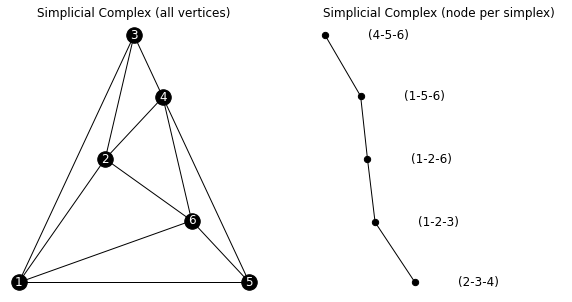

In [128]:
M.manifold.display()

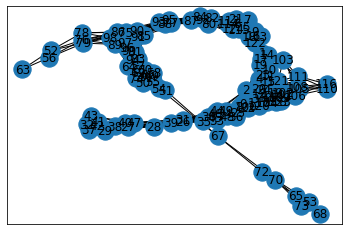

In [127]:
G = nx.from_numpy_matrix(M.in_dataset['pairwise_geodesic_distances'] < 0.4)
nx.draw_networkx(G)

In [129]:
M.manifold_kwargs

{'simplices': [(1, 2, 3), (2, 3, 4), (4, 5, 6), (5, 6, 1), (6, 1, 2)]}